# Task 3 - Exploratory Data Analysis

## Name: Emad Magdy

### Goal : Try to find out the week areas where you can work to make more profit

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore any warning that may appear
import warnings
warnings.filterwarnings("ignore")

### Loading dataset

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

### Exploring data

In [4]:
# show the first five rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# information about each column in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# number of rows (9994) and columns(13)
df.shape

(9994, 13)

In [7]:
# to check if there are any nan values 
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# statistical analysis
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# columns in dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
# unique values of each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Visualization

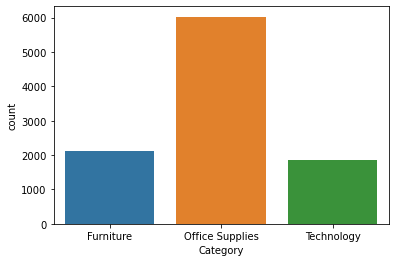

In [11]:
# count each category 
sns.countplot(df['Category'])
plt.show()

**Office supplies is the largest cateogory**

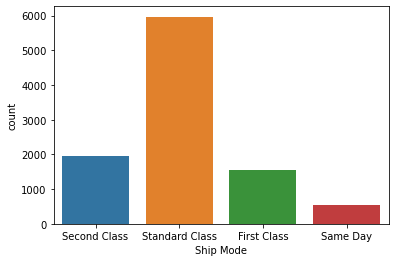

In [12]:
sns.countplot(df['Ship Mode'])
plt.show()

**Standard Class is the largest class used for shipment delivery and Same day is the lowest**

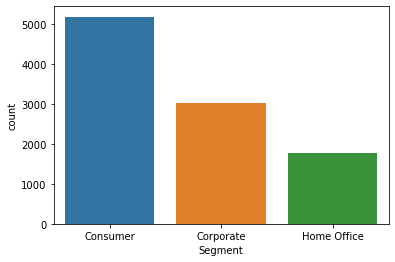

In [13]:
sns.countplot(df['Segment'])
plt.show()

####  Consumer is the most who buy 

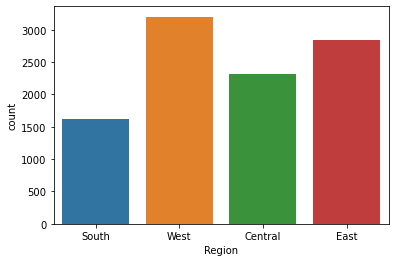

In [14]:
sns.countplot(df['Region'])
plt.show()

####  West and East are the most region that buy 

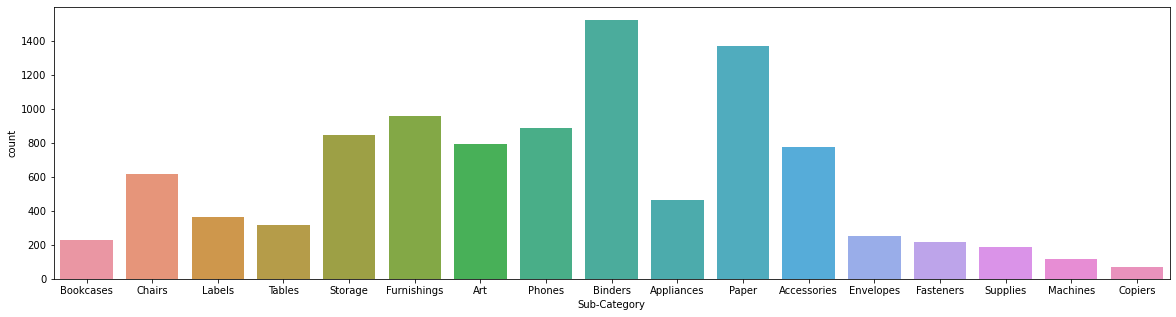

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(df['Sub-Category'])
plt.show()

####  Binders and Paper are the most sub-categories that be bought

### What are the most sub-catgories of sales?

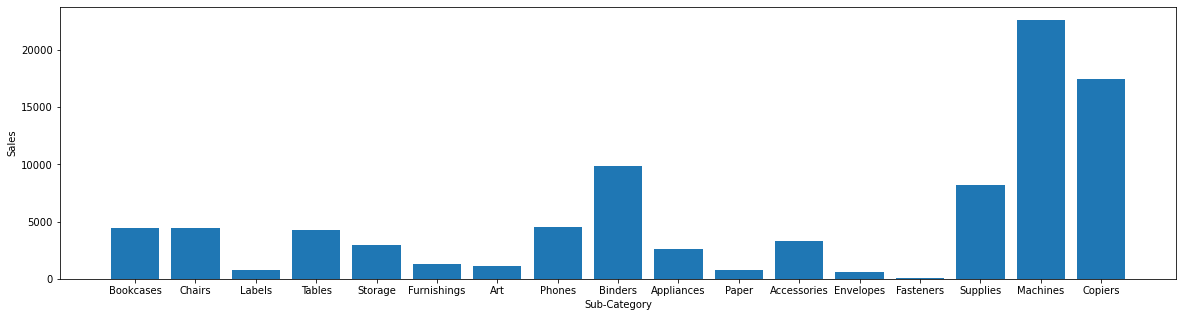

In [16]:
plt.figure(figsize=(20,5))
plt.bar(df['Sub-Category'],df['Sales'])
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

#### Machines and Copiers are the most sub-categories that be bought

### What are the most region of sales?

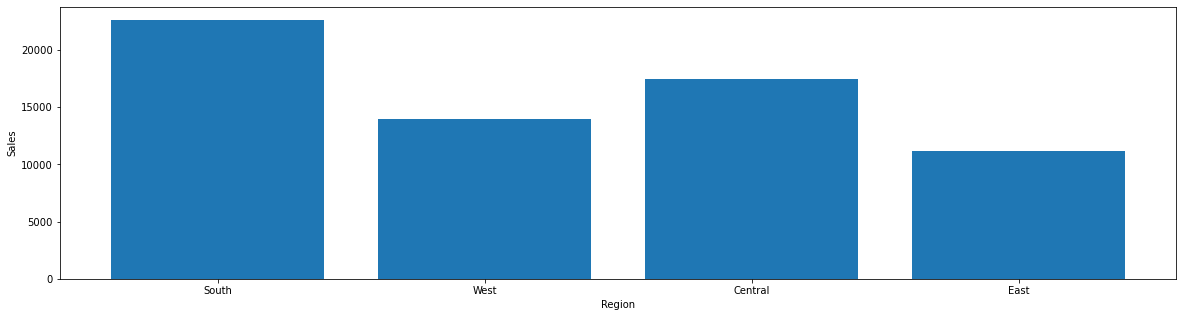

In [17]:
plt.figure(figsize=(20,5))
plt.bar(df['Region'],df['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

#### South is the most region in sales

### What is the maximum number of Sales in states?

In [18]:
sales_of_states = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(20)
sales_of_states

State
California        457687.6315
New York          310876.2710
Texas             170188.0458
Washington        138641.2700
Pennsylvania      116511.9140
Florida            89473.7080
Illinois           80166.1010
Ohio               78258.1360
Michigan           76269.6140
Virginia           70636.7200
North Carolina     55603.1640
Indiana            53555.3600
Georgia            49095.8400
Kentucky           36591.7500
New Jersey         35764.3120
Arizona            35282.0010
Wisconsin          32114.6100
Colorado           32108.1180
Tennessee          30661.8730
Minnesota          29863.1500
Name: Sales, dtype: float64

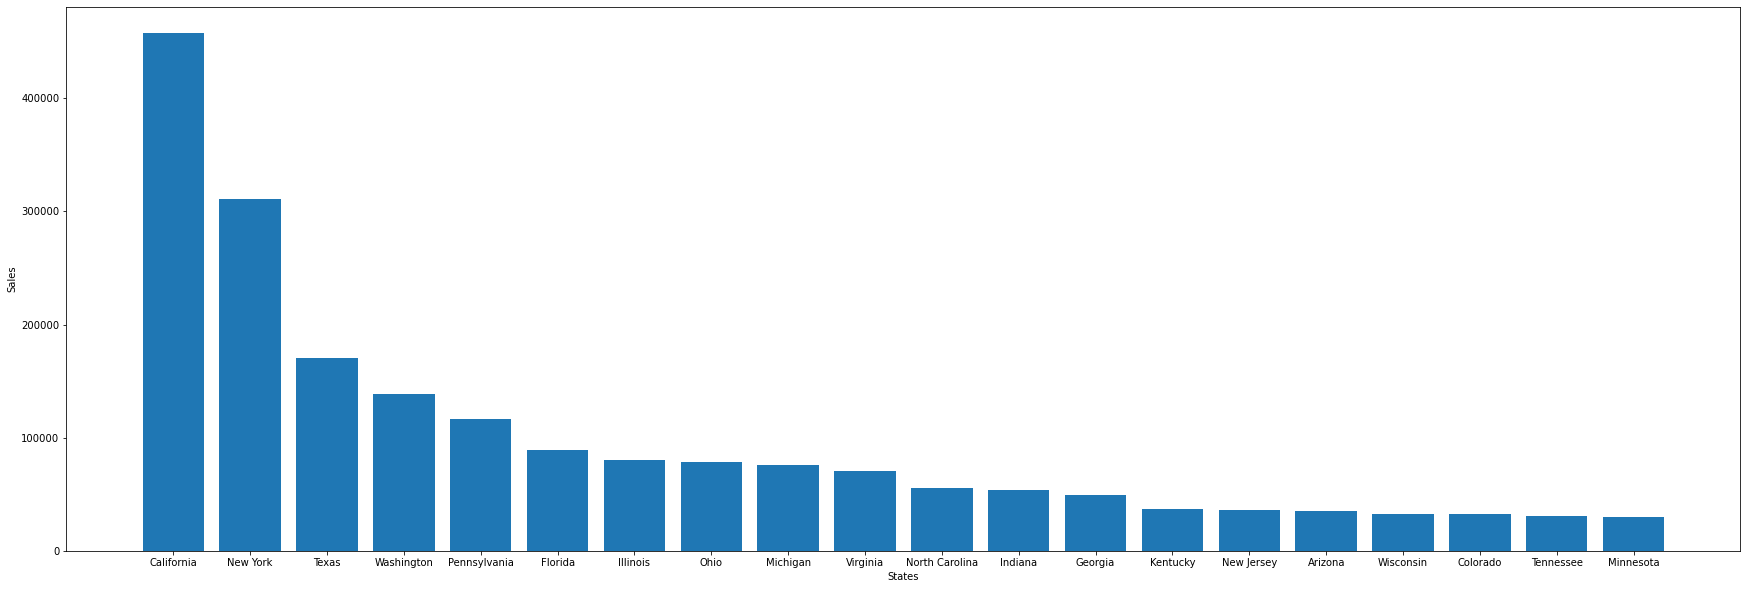

In [19]:
plt.figure(figsize=(30,10))
plt.bar(sales_of_states.index,sales_of_states.values)
plt.xlabel('States')
plt.ylabel('Sales')
plt.show()

#### Calfornia and New York have the maximum Sales

### What is the maximum number of Profit in states?

In [20]:
profit_of_states = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20)
profit_of_states

State
California       76381.3871
New York         74038.5486
Washington       33402.6517
Michigan         24463.1876
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64

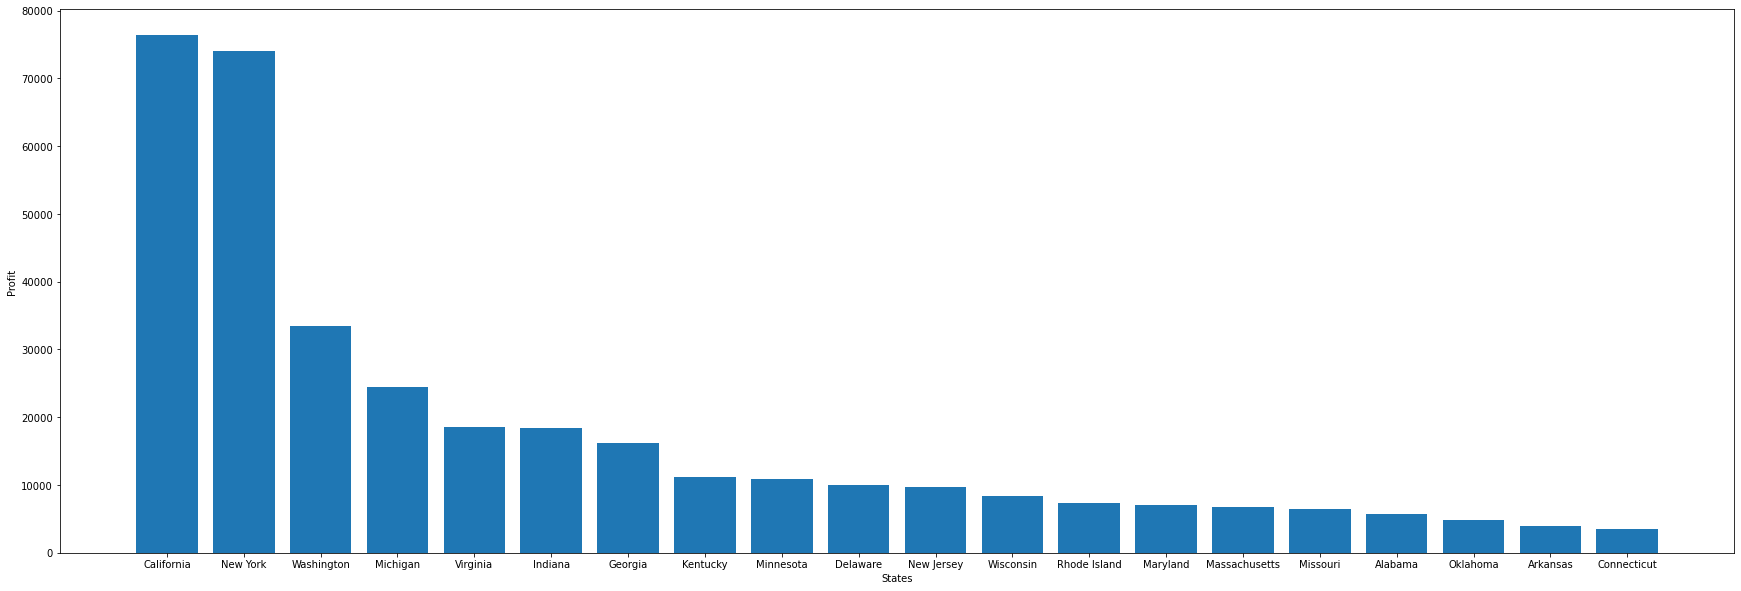

In [21]:
plt.figure(figsize=(30,10))
plt.bar(profit_of_states.index,profit_of_states.values)
plt.xlabel('States')
plt.ylabel('Profit')
plt.show()

#### Calfornia and New York have the maximum Profit

### We want to find the week areas so we will extract dataframe that has profits less than zero

In [22]:
# This is new dataframe that has profits less than zero
df_least_profits = df[df['Profit'] < 0]
df_least_profits

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


### What is the most segments have week profits

In [23]:
# create dataframe of Segment with 2 columns profit and discount
profit_segment = df_least_profits.groupby('Segment')['Profit','Discount'].sum()
profit_segment

,Profit,Discount
Segment,,
Consumer,-84945.7112,476.76
Corporate,-44787.2076,272.00
Home Office,-26398.3669,150.98


<AxesSubplot:xlabel='Segment'>

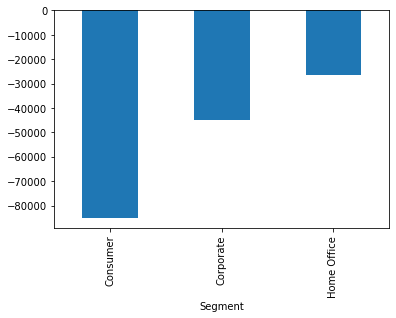

In [24]:
# plot the most segments have loss
profit_segment['Profit'].plot.bar()

In [25]:
# to find corr between profit and discount
profit_segment.corr()

,Profit,Discount
Profit,1.000000,-0.997944
Discount,-0.997944,1.000000


#### Strong corrlatoin between Profit and discount, so more discount leads to more loss

### What is the sub-category of each category has high loss?

In [26]:
df_least_profits.groupby(['Category','Sub-Category']).sum().sort_values(by=['Category','Profit'])

Postal Code        Sales  Quantity  Discount  \
Category        Sub-Category                                                 
Furniture       Tables           10224004  104978.5460       757     74.15   
                Bookcases         6423506   48072.7408       422     37.99   
                Chairs           15008025   91988.4560       876     61.40   
                Furnishings      10970913   12845.8440       597     88.60   
Office Supplies Binders          32609300   36140.6130      2456    452.40   
                Appliances        4825871    3382.5340       235     53.60   
                Storage           8606475   37869.0720       569     32.20   
                Supplies          1761430   14067.1760       110      6.60   
                Fasteners          701930     149.2800        55      2.40   
Technology      Machines          2236261   72456.2530       157     25.60   
                Phones            6105294   35797.8400       476     46.60   
                Accessories       5286382   10958.8000       330     18.20   

                                  Profit  
Category        Sub-Category              
Furniture       Tables       -32412.1483  
                Bookcases    -12152.2060  
                Chairs        -9880.8413  
                Furnishings   -6490.9134  
Office Supplies Binders      -38510.4964  
                Appliances    -8629.6412  
                Storage       -6426.3038  
                Supplies      -3015.6219  
                Fasteners       -33.1952  
Technology      Machines     -30118.6682  
                Phones        -7530.6235  
                Accessories    -930.6265

<AxesSubplot:xlabel='Category,Sub-Category'>

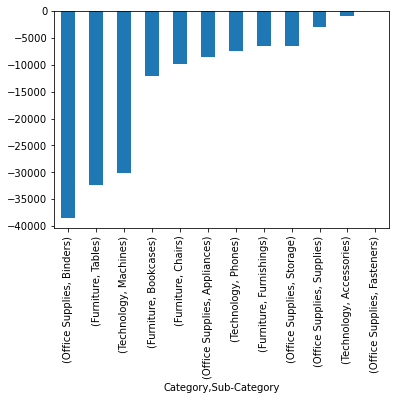

In [27]:
df_least_profits.groupby(['Category','Sub-Category'])['Profit'].sum().sort_values().plot.bar()

- Blinders have high loss of category Office Supplies (-38510.4964)
- Tables have high loss of category Furniture (-32412.1483)
- Machines have high loss of category Technology (-30118.6682)

### What is the most Regions have high loss of profits?

In [28]:
df_least_profits.groupby(['Region']).sum()

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,52868399,141282.6588,2803,407.14,-56314.8850
East,15129951,160864.0120,1988,247.10,-49590.6075
South,8511782,91635.1850,1004,127.35,-27504.8323
West,28249259,74925.2990,1245,118.15,-22720.9609


<AxesSubplot:xlabel='Region'>

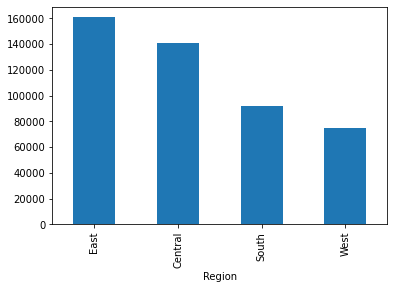

In [29]:
df_least_profits.groupby(['Region'])['Sales'].sum().sort_values(ascending=False).plot.bar()

#### The East and Cerntral Regions have the most  loss of profits